In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("global_air_pollution_data.csv")
df.head()

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23036 non-null  object
 1   city_name           23462 non-null  object
 2   aqi_value           23463 non-null  int64 
 3   aqi_category        23463 non-null  object
 4   co_aqi_value	       23463 non-null  int64 
 5   co_aqi_category     23463 non-null  object
 6   ozone_aqi_value     23463 non-null  int64 
 7   ozone_aqi_category  23463 non-null  object
 8   no2_aqi_value       23463 non-null  int64 
 9   no2_aqi_category    23463 non-null  object
 10  pm2.5_aqi_value     23463 non-null  int64 
 11  pm2.5_aqi_category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [4]:
df.isnull().sum()

country_name          427
city_name               1
aqi_value               0
aqi_category            0
co_aqi_value\t          0
co_aqi_category         0
ozone_aqi_value         0
ozone_aqi_category      0
no2_aqi_value           0
no2_aqi_category        0
pm2.5_aqi_value         0
pm2.5_aqi_category      0
dtype: int64

# EDA

In [5]:
df['aqi_category'].unique()

array(['Moderate', 'Good', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

In [6]:
df['aqi_category'].value_counts()

aqi_category
Good                              9936
Moderate                          9231
Unhealthy                         2227
Unhealthy for Sensitive Groups    1591
Very Unhealthy                     287
Hazardous                          191
Name: count, dtype: int64

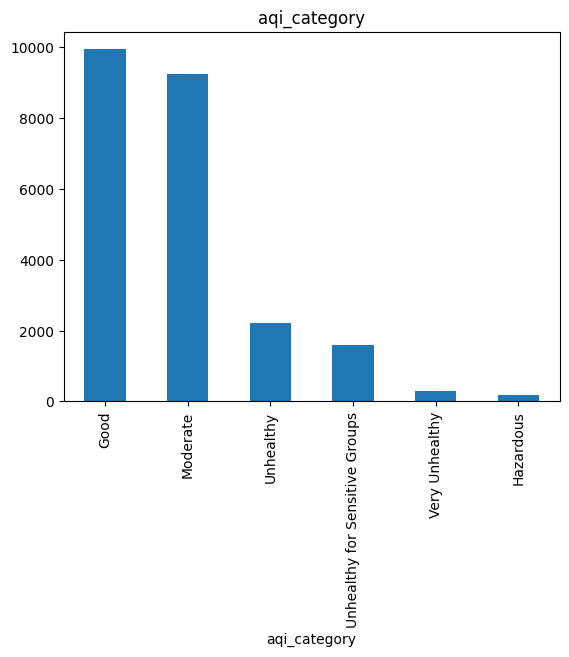

In [7]:
df['aqi_category'].value_counts().plot.bar()
plt.title('aqi_category')
plt.show()

Kualitas Udara Tidak Sehat: Ketika AQI melebihi 100, kualitas udara menjadi tidak sehat dan risiko terhadap kesehatan meningkat.

Kualitas Udara Baik: Nilai AQI 50 atau lebih rendah menunjukkan kualitas udara yang baik.

Kualitas Udara Baik: Nilai AQI 50 atau lebih rendah menunjukkan kualitas udara yang baik.

Sebagian besar kota memiliki kualitas udara yang baik (9688 kota)

9087 kota kualitas udaranya sedang

2215 kota memiliki kualitas udara yang tidak sehat

Kualitas udara 286 kota Sangat Tidak Sehat dan 191 Berbahaya

In [8]:
maxm=df[df['aqi_value']==df['aqi_value'].max()]
maxm

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
276,Pakistan,Bahawalnagar,500,Hazardous,1,Good,38,Good,1,Good,466,Hazardous
470,India,Rania,500,Hazardous,1,Good,40,Good,0,Good,464,Hazardous
524,India,Gohana,500,Hazardous,1,Good,47,Good,1,Good,500,Hazardous
611,India,Gunnaur,500,Hazardous,1,Good,73,Moderate,1,Good,500,Hazardous
620,Pakistan,Harunabad,500,Hazardous,1,Good,43,Good,0,Good,443,Hazardous
...,...,...,...,...,...,...,...,...,...,...,...,...
22110,India,Surajgarh,500,Hazardous,1,Good,40,Good,0,Good,464,Hazardous
22259,Russian Federation,Tynda,500,Hazardous,21,Good,8,Good,17,Good,475,Hazardous
22577,India,Bahjoi,500,Hazardous,1,Good,53,Moderate,1,Good,447,Hazardous
22824,India,Bilari,500,Hazardous,4,Good,158,Unhealthy,4,Good,457,Hazardous


In [9]:
maxm['country_name'].value_counts()

country_name
India                       95
Pakistan                     5
United States of America     1
South Africa                 1
Russian Federation           1
Name: count, dtype: int64

<Axes: xlabel='country_name'>

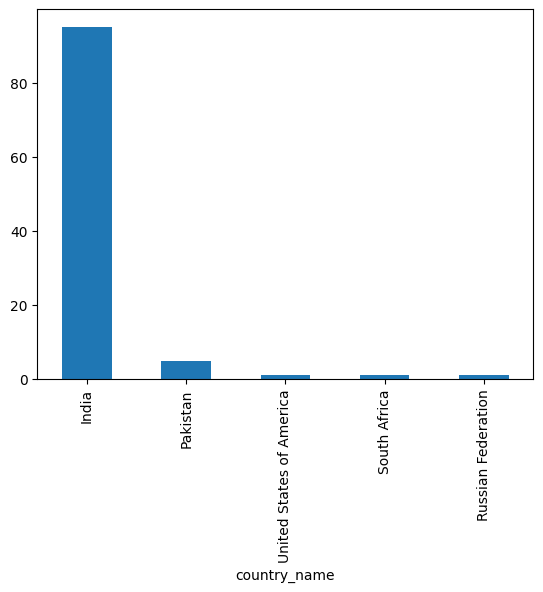

In [10]:
maxm['country_name'].value_counts().plot.bar()

Dari 103 kota, 95 kota tercemar berada di India, 5 kota berada di Pakistan dan kota-kota lainnya masing-masing berasal dari Amerika Serikat, Afrika Selatan, dan Federasi Rusia.

In [11]:
good_AQI_Country=df[df['aqi_value'] <=50]
good_AQI_Country['country_name'].value_counts()

country_name
Brazil                      1125
Russian Federation          1025
United States of America    1001
Germany                      717
Japan                        432
                            ... 
Dominican Republic             1
Jamaica                        1
Senegal                        1
Solomon Islands                1
Belize                         1
Name: count, Length: 139, dtype: int64

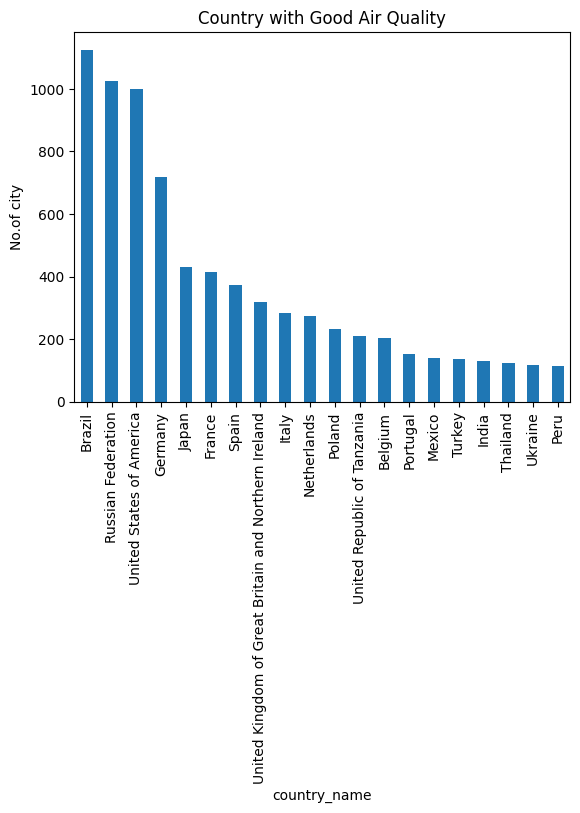

In [12]:
good_AQI_Country['country_name'].value_counts().head(20).plot.bar()
plt.title('Country with Good Air Quality')
plt.ylabel('No.of city')
plt.show()

Sebagian besar kota dengan kualitas Good Air berada di Brasil.

1.125 kota di Brasil memiliki kualitas udara yang baik.

Federasi Rusia berada di urutan kedua negara dengan kualitas udara yang baik.

AS, Jerman berada di peringkat ke-3 dan ke-4

In [13]:
df['co_aqi_value\t'].value_counts()

co_aqi_value\t
1      14867
0       3110
2       3012
3       1205
4        656
5        234
6        113
7         66
9         39
8         38
10        30
11        16
12        16
15        11
13        10
16         8
14         5
21         4
19         3
23         2
22         2
20         2
28         2
18         2
41         1
36         1
49         1
35         1
27         1
51         1
67         1
133        1
31         1
17         1
Name: count, dtype: int64

In [14]:
df[df['co_aqi_value\t']>50]

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
5156,United States of America,Durango,500,Hazardous,133,Unhealthy for Sensitive Groups,0,Good,53,Moderate,500,Hazardous
12800,Malaysia,Miri,209,Very Unhealthy,67,Moderate,209,Very Unhealthy,2,Good,157,Unhealthy
13398,Democratic Republic of the Congo,Kasongo Lunda,481,Hazardous,51,Moderate,39,Good,7,Good,446,Hazardous


Nilai CO AQI Kota Durango Amerika Serikat Jauh Lebih Tinggi Dibandingkan Kota Lainnya. Ini Tidak Sehat Bagi Kelompok Sensitif

Nilai CO AQI kota Durango sebesar 133

Nilai CO AQI di dua kota tersebut tergolong sedang. Miri dan Kasongo Lunda adalah kota-kota tersebut.

Semua kota selain Durango, Miri dan Kasongo Lunda mempunyai Nilai CO AQI yang baik.

Sebagian besar kota (14593) CO AQI adalah 1

In [15]:
df['ozone_aqi_value'].value_counts()

ozone_aqi_value
30     713
32     684
29     671
28     664
33     663
      ... 
199      1
189      1
222      1
235      1
214      1
Name: count, Length: 213, dtype: int64

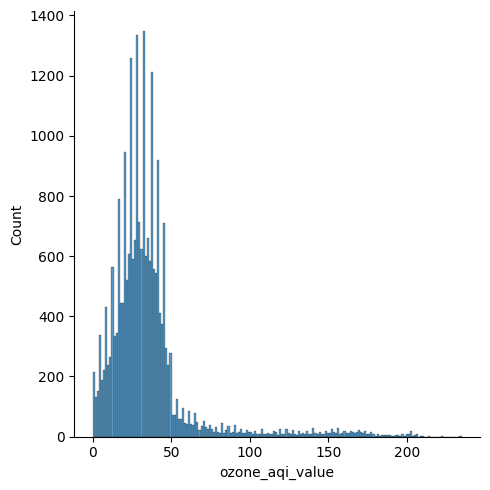

In [16]:
sns.displot(df['ozone_aqi_value'])

In [17]:
df[df['ozone_aqi_value']>100]['city_name'].count()

935

In [18]:
df[df['ozone_aqi_value']>200]['city_name'].count()

53

Sebagian besar Nilai AQI Ozon kota adalah antara 0 hingga 50 dan itu merupakan AQI Ozon yang baik.
935 kota memiliki AQI Ozon yang tidak sehat dan 53 kota memiliki AQI Ozon yang sangat tidak sehat.

In [19]:
df['no2_aqi_value'].value_counts()

no2_aqi_value
0     8242
1     4665
2     2715
3     1892
4     1265
5      882
6      665
7      482
8      405
9      298
10     271
11     223
12     184
13     172
15     120
14     118
18     101
16      88
19      85
17      79
20      67
22      49
21      48
23      44
25      32
24      30
26      28
27      24
30      23
28      22
31      18
29      17
34      15
33      14
36      12
35      10
39       8
37       6
47       4
41       4
32       4
48       3
59       3
44       3
51       3
46       3
40       2
52       2
38       2
49       2
91       1
64       1
58       1
63       1
53       1
61       1
42       1
69       1
43       1
Name: count, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_14984\3719810545.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['no2_aqi_value'])


<Axes: xlabel='no2_aqi_value', ylabel='Density'>

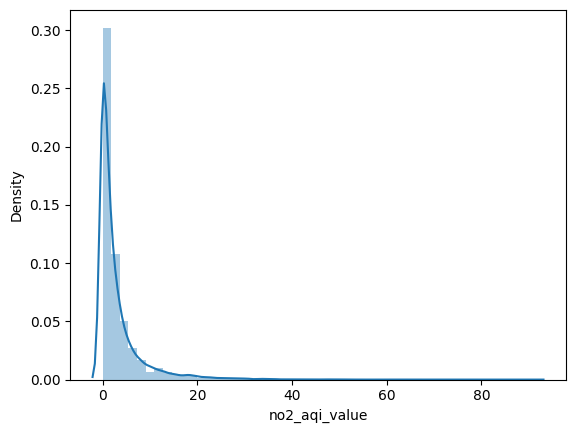

In [20]:
sns.distplot(df['no2_aqi_value'])

In [21]:
df[df['no2_aqi_value']>50]

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
1311,Indonesia,Leuwiliang,264,Very Unhealthy,15,Good,8,Good,52,Moderate,264,Very Unhealthy
1402,Republic of Korea,Seoul,421,Hazardous,27,Good,0,Good,91,Moderate,415,Hazardous
2972,China,Jiangdu,214,Very Unhealthy,13,Good,1,Good,59,Moderate,214,Very Unhealthy
3887,Algeria,Algiers,154,Unhealthy,10,Good,33,Good,69,Moderate,154,Unhealthy
4890,Indonesia,Curug,281,Very Unhealthy,15,Good,6,Good,59,Moderate,281,Very Unhealthy
4948,Indonesia,Pandegelang,195,Unhealthy,8,Good,17,Good,51,Moderate,195,Unhealthy
5156,United States of America,Durango,500,Hazardous,133,Unhealthy for Sensitive Groups,0,Good,53,Moderate,500,Hazardous
8316,China,Cholan,168,Unhealthy,5,Good,0,Good,61,Moderate,168,Unhealthy
8328,China,Xiaolingwei,198,Unhealthy,12,Good,1,Good,52,Moderate,198,Unhealthy
9922,China,Yizheng,199,Unhealthy,12,Good,0,Good,59,Moderate,199,Unhealthy


Sebagian besar nilai AQI NO2 kota adalah b/w 0 dan 10 .

Banyak kota yang mempunyai nilai NO2 AQi yang baik.

beberapa kota masuk dalam kategori sedang.

In [22]:
df[df['pm2.5_aqi_value']>100]

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
9,Egypt,Qalyub,142,Unhealthy for Sensitive Groups,3,Good,89,Moderate,9,Good,142,Unhealthy for Sensitive Groups
12,India,Radaur,158,Unhealthy,3,Good,139,Unhealthy for Sensitive Groups,1,Good,158,Unhealthy
13,Pakistan,Radhan,158,Unhealthy,1,Good,50,Good,1,Good,158,Unhealthy
16,India,Rajgir,154,Unhealthy,3,Good,100,Unhealthy for Sensitive Groups,2,Good,154,Unhealthy
19,India,Phulabani,161,Unhealthy,2,Good,71,Moderate,0,Good,161,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...
23429,Mexico,Tlaltelulco,181,Unhealthy,3,Good,2,Good,11,Good,181,Unhealthy
23436,Nigeria,Hadejia,141,Unhealthy for Sensitive Groups,4,Good,42,Good,2,Good,141,Unhealthy for Sensitive Groups
23439,Venezuela (Bolivarian Republic of),Villa De Cura,131,Unhealthy for Sensitive Groups,2,Good,9,Good,10,Good,131,Unhealthy for Sensitive Groups
23449,China,Wangqing,101,Unhealthy for Sensitive Groups,3,Good,35,Good,2,Good,101,Unhealthy for Sensitive Groups


In [23]:
df['pm2.5_aqi_value'].value_counts()

pm2.5_aqi_value
50     483
54     427
52     414
51     411
53     376
      ... 
370      1
256      1
441      1
353      1
253      1
Name: count, Length: 383, dtype: int64

In [24]:
df['pm2.5_aqi_category'].value_counts()

pm2.5_aqi_category
Good                              10208
Moderate                           9075
Unhealthy                          2129
Unhealthy for Sensitive Groups     1624
Very Unhealthy                      255
Hazardous                           172
Name: count, dtype: int64

<Axes: xlabel='pm2.5_aqi_category'>

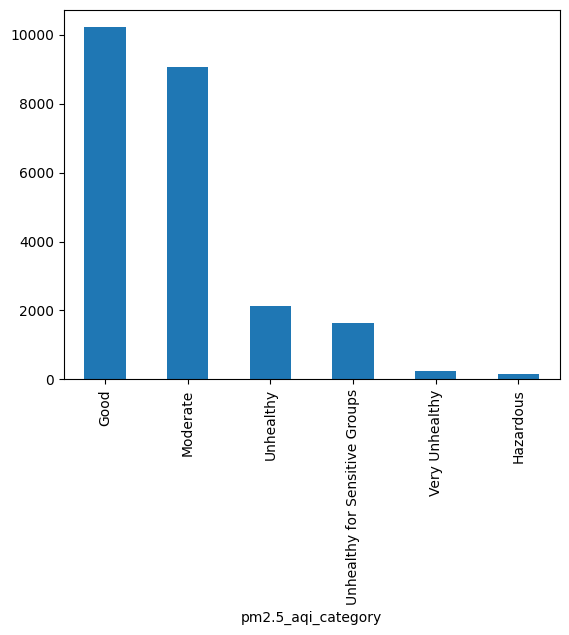

In [25]:
df['pm2.5_aqi_category'].value_counts().plot.bar()

sebagian besar kota memiliki nilai PM2.5 AQI yang baik (9950 kota)

8939 kota mempunyai nilai PM2.5 AQI Sedang dan 172 kota mempunyai nilai PM2.5 AQI Berbahaya

C:\Users\USER\AppData\Local\Temp\ipykernel_14984\1191346723.py:12: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


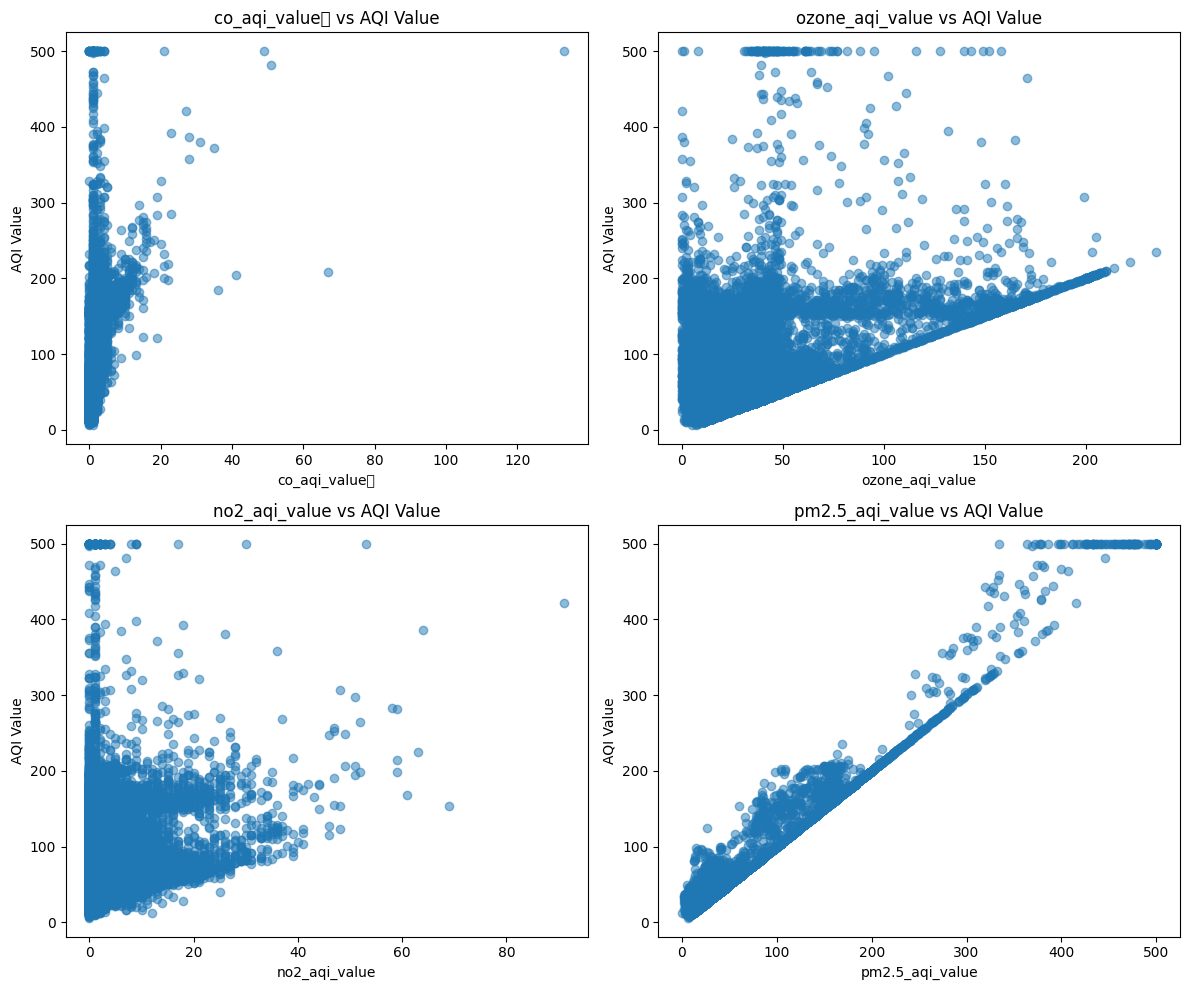

In [26]:
pollutants = ['co_aqi_value\t', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value']
aqi_values = df['aqi_value']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    ax.scatter(df[pollutants[i]], aqi_values, alpha=0.5)
    ax.set_xlabel(pollutants[i])
    ax.set_ylabel('AQI Value')
    ax.set_title(f'{pollutants[i]} vs AQI Value')

plt.tight_layout()
plt.show()

dalam plot sebar nilai PM2.5, pola dan titik-titik yang jelas diselaraskan, kemungkinan menunjukkan kontribusi signifikan polutan tersebut terhadap kualitas udara secara keseluruhan.

CO dan Ozon memberikan sedikit kontribusi polutan tersebut terhadap kualitas udara secara keseluruhan.

In [27]:
df.corr(numeric_only=True)

,aqi_value,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value
aqi_value,1.000000,0.430602,0.405310,0.231758,0.984327
co_aqi_value\t,0.430602,1.000000,0.145724,0.488092,0.438557
ozone_aqi_value,0.405310,0.145724,1.000000,-0.181818,0.339887
no2_aqi_value,0.231758,0.488092,-0.181818,1.000000,0.260127
pm2.5_aqi_value,0.984327,0.438557,0.339887,0.260127,1.000000


Nilai AQI PM2.5 dan Nilai AQI nampaknya mempunyai korelasi positif yang kuat, artinya PM2.5 berpengaruh langsung terhadap pencemaran udara.

AQI memiliki hubungan positif yang lemah dengan Karbon monoksida dan Ozon.

# Kesimpulan
Kualitas Udara Secara Keseluruhan: Mayoritas kota menunjukkan kualitas udara yang baik, sementara sebagian besar kota mengalami kondisi sedang hingga tidak sehat, dan sebagian kecil kota mencapai tingkat yang sangat tidak sehat dan berbahaya.

Kesenjangan Regional: India memiliki sejumlah besar kota dengan nilai AQI yang tinggi, yang menunjukkan masalah polusi yang parah, sementara Brasil memiliki kota-kota dengan kualitas udara yang baik.

Kontribusi Polutan: PM2.5 muncul sebagai polutan penting yang mempengaruhi kualitas udara secara keseluruhan, dengan korelasi positif yang jelas dengan AQI. Polutan lain seperti CO dan Ozon juga berperan, meskipun pada tingkat yang lebih rendah.

Analisis Korelasi: Nilai AQI PM2.5 menunjukkan korelasi positif yang kuat dengan AQI secara keseluruhan, yang menunjukkan dampak signifikan terhadap tingkat polusi udara. Sementara itu, Karbon Monoksida dan Ozon menunjukkan korelasi yang lebih lemah dengan AQI.

In [28]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [29]:
# Data preprocessing
df_clustering = df.drop(['country_name', 'city_name', 'aqi_category', 'co_aqi_category', 'ozone_aqi_category', 'no2_aqi_category', 'pm2.5_aqi_category'], axis=1)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)


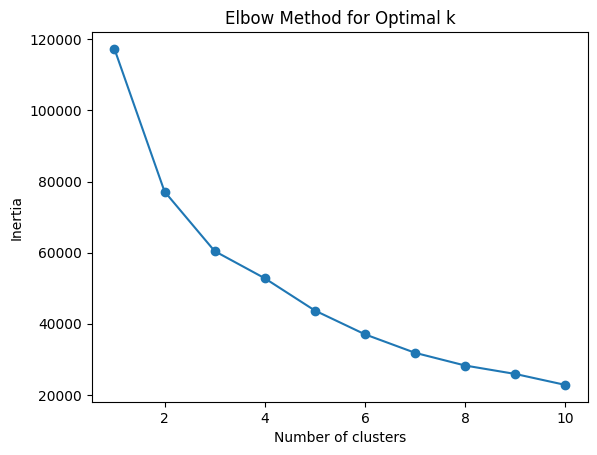

In [30]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [31]:
# Fit KMeans clustering with optimal number of clusters and adjusted parameters
optimal_k = 3  # Adjust based on Elbow Method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, random_state=42)
kmeans.fit(df_scaled)

# Add cluster labels to the original DataFrame
df['cluster_label'] = kmeans.labels_


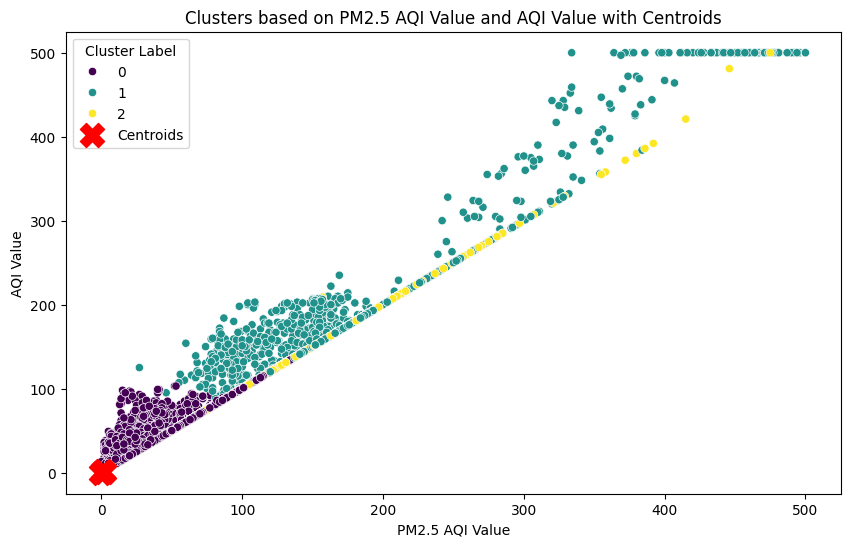

In [36]:
# Visualize clusters with centroids
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='pm2.5_aqi_value', y='aqi_value', hue='cluster_label', palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('AQI Value')
plt.title('Clusters based on PM2.5 AQI Value and AQI Value with Centroids')
plt.legend(title='Cluster Label')
plt.show()


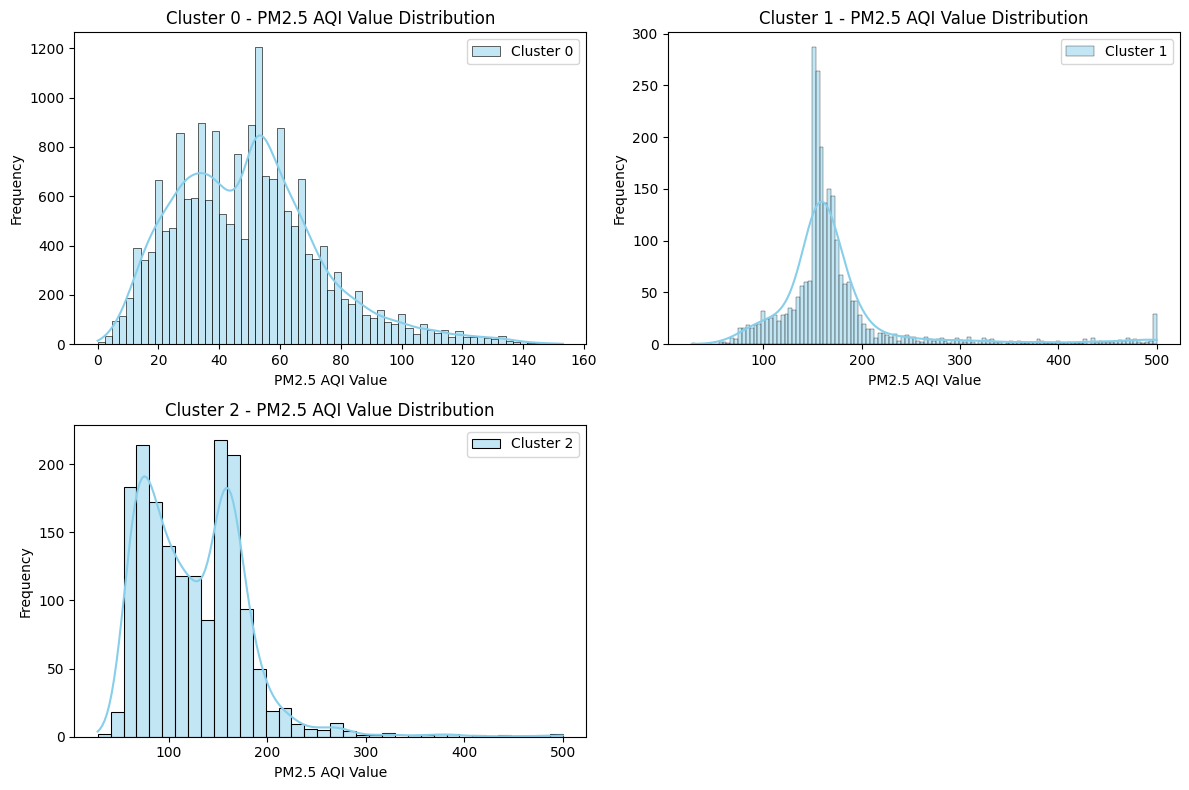

In [33]:
# Analyzing cluster distributions
plt.figure(figsize=(12, 8))

for cluster_num in range(optimal_k):
    plt.subplot(2, 2, cluster_num + 1)
    cluster_data = df[df['cluster_label'] == cluster_num]
    sns.histplot(cluster_data['pm2.5_aqi_value'], kde=True, color='skyblue', label=f'Cluster {cluster_num}')
    plt.title(f'Cluster {cluster_num} - PM2.5 AQI Value Distribution')
    plt.xlabel('PM2.5 AQI Value')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


In [37]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Inertia (sudah dihitung saat fitting KMeans sebelumnya)
print(f"Inertia: {kmeans.inertia_}")

# Silhouette Score
silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(df_scaled, kmeans.labels_)
print(f"Davies-Bouldin Index: {davies_bouldin}")


Inertia: 60423.95994189293


Silhouette Score: 0.6116778525639853
Davies-Bouldin Index: 1.0539620729276635


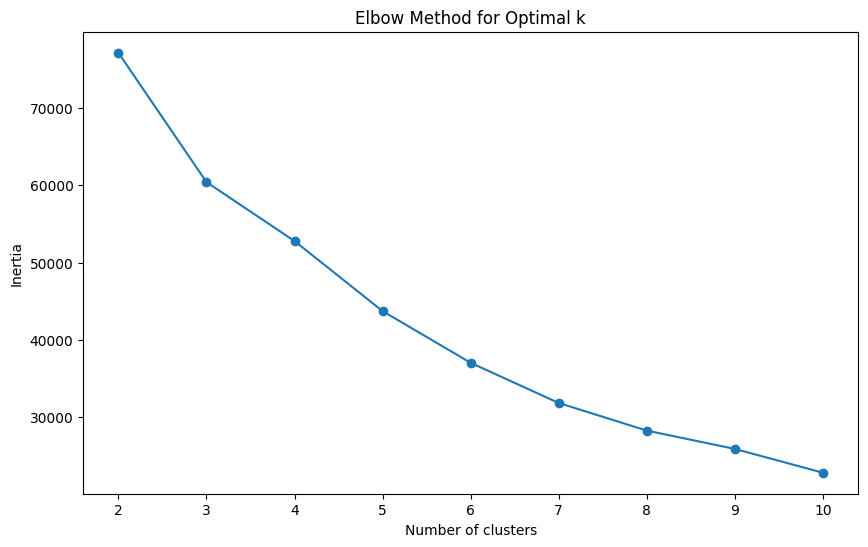

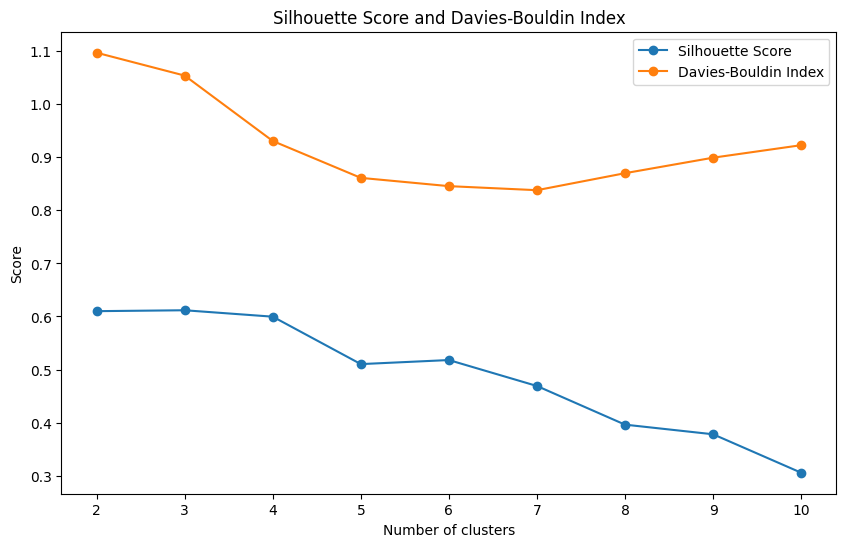

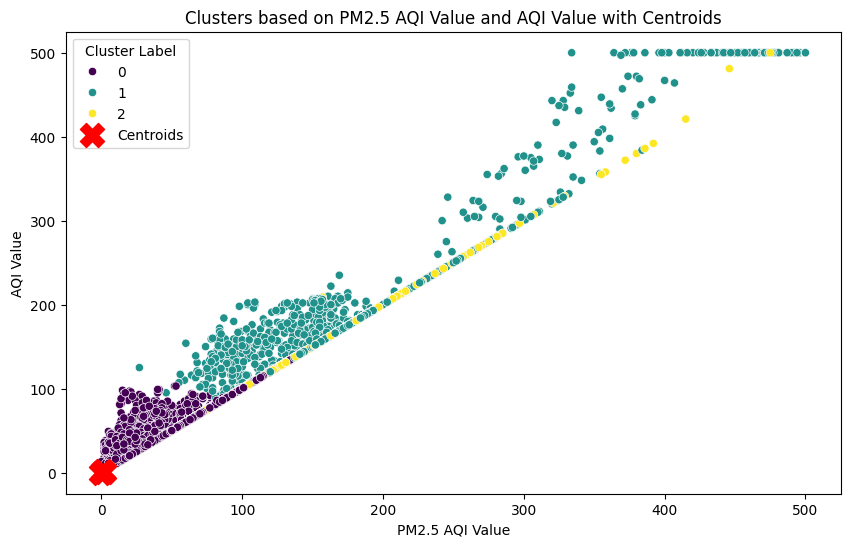

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load dataset
df = pd.read_csv("global_air_pollution_data.csv")

# Data preprocessing
df_clustering = df.drop(['country_name', 'city_name', 'aqi_category', 'co_aqi_category', 'ozone_aqi_category', 'no2_aqi_category', 'pm2.5_aqi_category'], axis=1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
davies_bouldin_scores = []

for k in range(2, 11):  # Pilih range cluster yang ingin dievaluasi
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(df_scaled, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plotting Silhouette Score and Davies-Bouldin Index
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', label='Silhouette Score')
plt.plot(range(2, 11), davies_bouldin_scores, marker='o', label='Davies-Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Silhouette Score and Davies-Bouldin Index')
plt.legend()
plt.show()

# Fit KMeans clustering with optimal number of clusters
optimal_k = 3  # Adjust based on Elbow Method or evaluation
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, random_state=42)
kmeans.fit(df_scaled)

# Add cluster labels to the original DataFrame
df['cluster_label'] = kmeans.labels_

# Visualize clusters with centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pm2.5_aqi_value', y='aqi_value', hue='cluster_label', palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('AQI Value')
plt.title('Clusters based on PM2.5 AQI Value and AQI Value with Centroids')
plt.legend(title='Cluster Label')
plt.show()


In [39]:
# Calculate Silhouette Score and Davies-Bouldin Index
silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
davies_bouldin = davies_bouldin_score(df_scaled, kmeans.labels_)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

Silhouette Score: 0.6116778525639853
Davies-Bouldin Index: 1.0539620729276635
